In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df.head()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


# Mean Squared Error Model

Calculate the MSE for the exising practice with 90 standby drivers by default.

In [4]:
mean_squared_error(df.n_sby.iloc[922:], df.sby_need.iloc[922:])
# calculate RMSE
RMSE = (mean_squared_error(df.n_sby.iloc[922:], df.sby_need.iloc[922:]))**0.5
print(RMSE)

112.51639494062536


The mean squared error for the existing method is 12659.939130434783

# Linear Regression for comparison

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
model = LinearRegression()

In [9]:
# train test split
X = df[['n_duty', 'n_sby']]
y = df.sby_need.values.reshape(-1,1)



In [ ]:
#def train_test_split(data, n_test):
	#return data[:-n_test, :], data[-n_test:, :]

In [10]:
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]

In [11]:
x_train, x_test = train_test_split(X, 922)
y_train, y_test = train_test_split(y, 922)


In [ ]:
#x_train, x_test = train_test_split(X, 231)
#y_train, y_test = train_test_split(y, 231)

In [13]:
model.fit(x_train, y_train)

LinearRegression()

In [14]:
import numpy as np
pred_test = model.predict(x_test)
pred_train = model.predict(x_train)
pred = np.append(pred_train, pred_test)

df['y_predicted'] = pred

In [15]:
df.head()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,y_predicted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,25.666336
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,25.666336
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,25.666336
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,25.666336
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,25.666336


In [16]:
# slope of the line
model.coef_

array([[0.04447404, 0.        ]])

In [17]:
# intercept of the line
model.intercept_

array([-49.93952542])

In [18]:
# calculate mse
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# The coefficients
print("Coefficients:")
print("Slope: " + str(model.coef_))
print("y-intercept: " + str(model.intercept_))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(df['sby_need'].iloc[920:], df['y_predicted'].iloc[920:]))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(df['sby_need'].iloc[920:], df['y_predicted'].iloc[920:]))


Coefficients:
Slope: [[0.04447404 0.        ]]
y-intercept: [-49.93952542]
Mean squared error: 11721.17
Coefficient of determination: -0.03


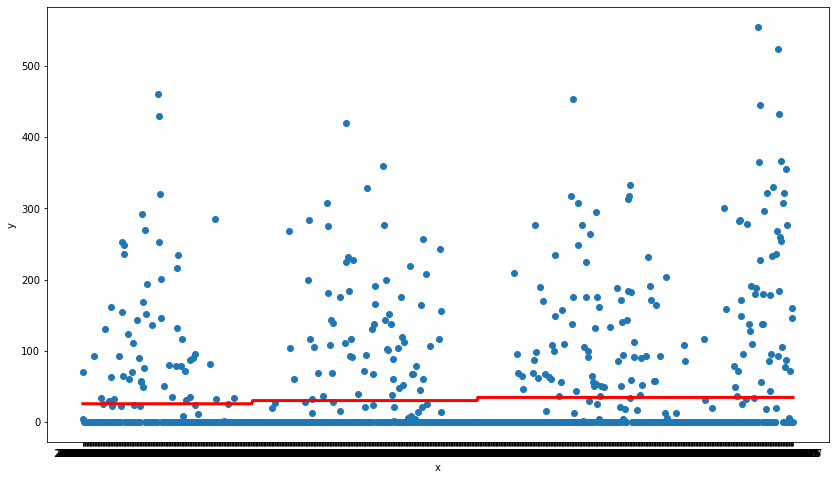

In [20]:
# plot the results
plt.figure(figsize=(14, 8))
ax = plt.axes()
ax.scatter(df.date, y)
ax.plot(df.date, pred, color='red', linewidth=3)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()